In [1]:
import numpy as np
from matplotlib import pyplot as plt
import vaex

import illustris_python as il
from cycler import cycler

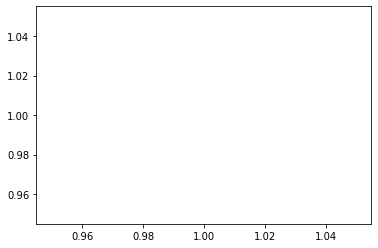

In [2]:
%matplotlib inline

plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.rcParams["axes.prop_cycle"] = cycler("color",('indigo','b','r','k','#ff7f0e','g'))
plt.show()

In [3]:
path = "/net/virgo01/data/users/spirov/Nexus Project/"
df = vaex.open(path+"135.hdf5")

In [4]:
@vaex.register_function()
def correct(x):
    L = 75000
    return np.where(np.abs(x)>L/2, x-np.sign(x)*L,x)

def localizeDataFrame(absDf, x,y,z):
    rx = absDf.X - x
    ry = absDf.Y - y
    rz = absDf.Z - z
    
    L = 75000
    
    relx = rx.correct()
    rely = ry.correct()
    relz = rz.correct()
    
    
    relR = np.sqrt(relx**2 + rely**2+relz**2)
    
    theta = np.arccos(relz/relR)
    fi = np.arctan2(rely,relx)
    
    relDf = absDf.copy()
    
    Vaway = (relx*absDf.Vx+rely*absDf.Vy+relz*absDf.Vz)/relR
    
    
    relDf["relX"] = relx
    relDf["relY"] = rely
    relDf["relZ"] = relz
    
    
    
    relDf["R"] = relR
    relDf["Th"] = theta
    relDf["Fi"] = fi
    relDf["Vr"] = Vaway

    
    return relDf
    
    



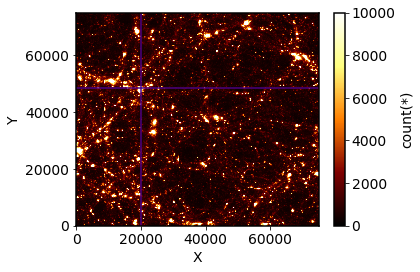

In [5]:
fx = 20026.872969109718
fy = 48608.2650390964
fz = 48593.901957099086


df.viz.heatmap("X","Y",vmin=0,vmax=1e4)
plt.axhline(fy)
plt.axvline(fx)


In [6]:

fdf = localizeDataFrame(df,fx,fy,fz)

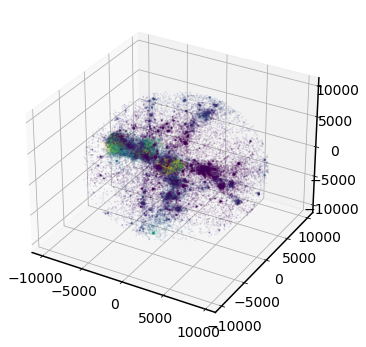

In [7]:
#%matplotlib notebook
n = 50
localFrame = fdf[fdf.R<1e4]
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')

Xs = localFrame.relX.values
Ys = localFrame.relY.values
Zs = localFrame.relZ.values
vrs = localFrame.Vr.values

sc = ax.scatter(Xs[::n],Ys[::n],Zs[::n],s=0.5,alpha = .1,c=vrs[::n],vmin = -500,vmax=500)

plt.show()



In [8]:
localFrame.relZ.mean()

array(281.78692147)

In [9]:
Xs = []
Ys = []
Zs = []

fx = 20026.872969109718
fy = 48608.2650390964
fz = 48593.901957099086

w=1
siz = 1e4


for i in range(100):
    fatDf = localizeDataFrame(df, fx,fy,fz)
    cutFat = fatDf[fatDf.R<siz]
    rrx =cutFat.relX.mean()
    rry = cutFat.relY.mean()
    rrz = cutFat.relZ.mean()

    Xs.append(rrx)
    Ys.append(rry)
    Zs.append(rrz)
    
    fx+=rrx*w
    fy+=rry*w  # flip + to find local minimum
    fz+=rrz*w
    
    r=np.sqrt(rrx**2+rry**2+rrz**2)
    
    #df.viz.heatmap("X","Y",vmin=0,vmax=1e4)
    #plt.axhline(fy)
    #plt.axvline(fx)
    #plt.show()
    
    print(i,r)
    
    if i==20:
        w=0.1
    
    if r < 1e-1:
        break

0 1712.4945528998135
1 688.175756323216
2 271.72364444446237
3 190.22302533422211
4 181.60461718780388
5 117.02363129076637
6 59.453184109325335
7 31.333629515901244
8 17.19811894035585
9 10.24993144766788
10 6.14539866612441
11 3.795309813038674
12 2.3968264893965063
13 1.452356749934062
14 0.8537349670893642
15 0.5630208977565493
16 0.4039599859834133
17 0.2517108340783499
18 0.14450633673333727
19 0.0838520275610819


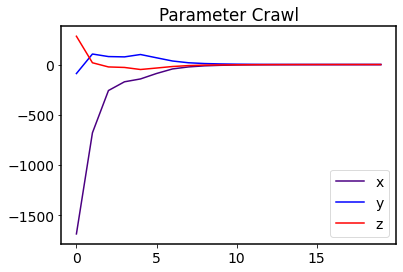

In [10]:
plt.plot(Xs,label='x')
plt.plot(Ys,label='y')
plt.plot(Zs,label='z')
plt.title('Parameter Crawl')
#plt.yscale('log')
plt.legend()
plt.show()

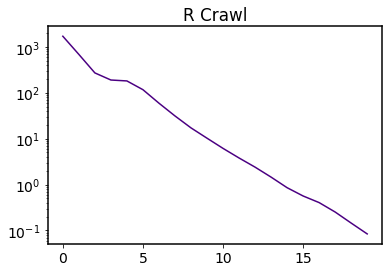

In [11]:
Rs = np.sqrt(np.square(Xs)+np.square(Ys)+np.square(Zs))
plt.plot(Rs,label='x')
plt.title('R Crawl')
plt.yscale('log')
plt.show()

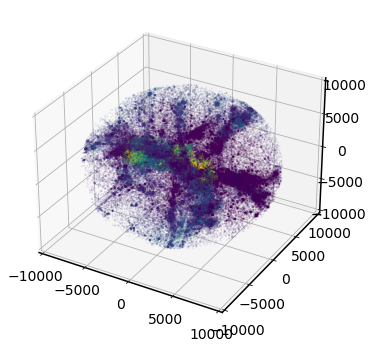

In [12]:
#%matplotlib notebook
n = 10
localFrame = cutFat
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')

Xs = localFrame.relX.values
Ys = localFrame.relY.values
Zs = localFrame.relZ.values
vrs = localFrame.Vr.values


ax.set_xlim(-1e4,1e4)
ax.set_zlim(-1e4,1e4)
ax.set_ylim(-1e4,1e4)
ax.scatter(Xs[::n],Ys[::n],Zs[::n],s=0.5,alpha = .1,c=vrs[::n],vmin = -500,vmax=500)
plt.show()


In [13]:
print(fx,fy,fz)

16896.629098069836 49023.506989193535 48711.977909898626


In [14]:
localFrame

#,ID,X,Y,Z,Vx,Vy,Vz,relX,relY,relZ,R,Th,Fi,Vr
0,32968543,19752.85,47539.44,49008.516,-135.20187,41.566643,45.421795,2856.154296875,-1484.0234375,296.50390625,3232.3145727215892,1.4789360486137273,-0.4791949130976254,-134.385294323699
1,36253968,19752.7,47542.203,49009.96,-31.186357,16.989326,-18.758793,2856.00390625,-1481.26171875,297.94921875,3231.0475590593214,1.4784507001898997,-0.478454748622357,-37.084927803297205
2,29689043,19753.451,47542.32,49005.54,-76.03529,103.81716,-63.191254,2856.755859375,-1481.14453125,293.52734375,3231.253853236249,1.479830850988859,-0.4783148330700244,-120.5509904433889
3,32967668,19754.02,47543.734,49007.727,-280.15137,61.993305,2.704936,2857.32421875,-1479.73046875,295.71484375,3231.3079735637207,1.4791525767223337,-0.4778433942261874,-275.868715242018
4,29685393,19749.08,47541.43,49009.867,-104.42354,81.94567,91.027435,2852.384765625,-1482.03515625,297.85546875,3228.195306327489,1.4783980411718716,-0.4791867202248894,-121.4887633417353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,035,856",89086238,8366.837,52551.848,45401.367,866.0205,16.383087,117.52749,-8529.8583984375,3528.3828125,-3310.64453125,9806.545608991766,1.9151574575090609,2.7493740089613397,-787.0578024259794
"4,035,857",89086263,8376.308,52612.156,45557.29,900.8916,43.170246,198.41693,-8520.3876953125,3588.69140625,-3154.72265625,9768.724969287563,1.8996317675961716,2.7429545966178095,-833.9851351322973
"4,035,858",89086313,8257.929,52682.582,45423.113,827.7458,17.970322,193.82689,-8638.7666015625,3659.1171875,-3288.8984375,9941.54313576718,1.907972654062869,2.740934360844578,-776.7832425134043
"4,035,859",89086338,8388.87,52639.508,45565.76,885.50793,40.21571,219.9088,-8507.8251953125,3616.04296875,-3146.25,9765.129050265567,1.8988407617422223,2.739700376636743,-827.4558376998614


In [15]:
Ixy = (localFrame.relX*localFrame.relY).sum().item()
Ixz = (localFrame.relX*localFrame.relZ).sum().item()
Iyz = (localFrame.relY*localFrame.relZ).sum().item()

Ixx = (localFrame.relY**2 + localFrame.relZ**2).sum().item()
Iyy = (localFrame.relX**2 + localFrame.relZ**2).sum().item()
Izz = (localFrame.relY**2 + localFrame.relX**2).sum().item()


In [16]:
InertiaTensor = np.array(((Ixx,Ixy,Ixz),(Ixy,Iyy,Iyz),(Ixz,Iyz,Izz)))

In [17]:
InertiaTensor

array([[ 6.05493849e+13, -2.15048938e+13,  1.11403160e+13],
       [-2.15048938e+13,  1.14719278e+14, -3.31623641e+12],
       [ 1.11403160e+13, -3.31623641e+12,  1.20764430e+14]])

In [18]:
vals, vecs = np.linalg.eig(InertiaTensor)

In [19]:
vals

array([5.17502236e+13, 1.28878333e+14, 1.15404536e+14])

In [20]:
semis = vals**-0.5

In [21]:
e2 = np.sqrt(vals[0]/vals[2])
e3 = np.sqrt(vals[1]/vals[2]) 


In [22]:
e2,e3

(0.6696450689480671, 1.05676522726595)

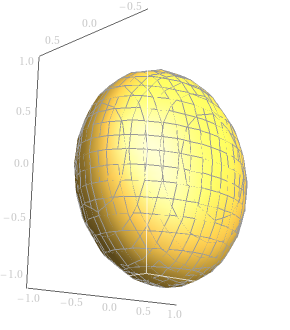

# Tensor in CZ

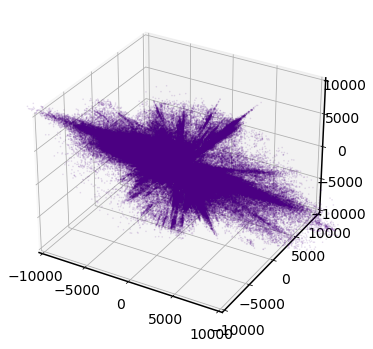

In [24]:
#%matplotlib notebook
n = 10
localFrame = cutFat
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')


CZ = localFrame.R+localFrame.Vr*10

phaseX = CZ*np.sin(localFrame.Th)*np.cos(localFrame.Fi)
phaseY = CZ*np.sin(localFrame.Th)*np.sin(localFrame.Fi)
phaseZ = CZ*np.cos(localFrame.Th)

pX = phaseX.values
pY = phaseY.values
pZ = phaseZ.values


ax.set_xlim(-1e4,1e4)
ax.set_zlim(-1e4,1e4)
ax.set_ylim(-1e4,1e4)
ax.scatter(pX[::n],pY[::n],pZ[::n],s=0.5,alpha = .1)
plt.show()


In [ ]:
pIxy = (phaseX*phaseY).sum().item()
pIxz = (phaseX*phaseZ).sum().item()
pIyz = (phaseY*phaseZ).sum().item()

pIxx = (phaseY**2 + phaseZ**2).sum().item()
pIyy = (phaseX**2 + phaseZ**2).sum().item()
pIzz = (phaseY**2 + phaseX**2).sum().item()


In [ ]:
CZInertiaTensor = np.array(((pIxx,pIxy,pIxz),(pIxy,pIyy,pIyz),(pIxz,pIyz,pIzz)))

In [ ]:
CZInertiaTensor

In [ ]:
pvals, pvecs = np.linalg.eig(CZInertiaTensor)

In [ ]:
pvals

In [ ]:
pe2 = np.sqrt(pvals[0]/pvals[2])
pe3 = np.sqrt(pvals[1]/pvals[2]) 


In [ ]:
pe2,pe3

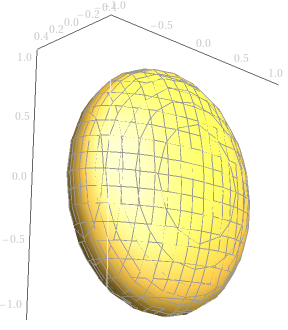

In [ ]:
nvs = []

for i in range(3):
    nvs.append(vecs[i].dot(pvecs[i]))


In [ ]:
print(nvs)

In [ ]:

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')

zer = [0,0,0]

def plotVect(v,co="b",l=""):
    plt.plot([0,v[0]],[0,v[1]],[0,v[2]],c=co,label = l)
    plt.plot(v[0],v[1],v[2],marker="v",c=co)
    
plotVect(vecs[0],co = 'r',l="Original Eigenvectors")
plotVect(vecs[1],co = 'r')
plotVect(vecs[2],co = 'r')


plotVect(pvecs[0],co = 'g',l="CZ Eigenvectors")
plotVect(pvecs[1],co = 'g')
plotVect(pvecs[2],co = 'g')

plt.legend()
plt.title("Transformation of Basis Vectors")

plt.show()

In [ ]:
print(np.sqrt(vals/pvals))